# `Applied Machine Learning`

*The rules and guidelines can be found at the Rules section at the end of the LAB.

## `Lab 2. Numpy and Pandas basics`

In this lesson we will discuss the most popular Python libraries for data preprocessing, manipulation and computation. Those task are extremely important to process data before training specific Machine Learning model. Moreover the proper Explanatory Data Analysis (**EDA**) can simplify training process and greatly increase final performance of the model. So, skill of manipulating with raw data is vital for proper Machine Leaning pipeline.

In [1]:
! pip install numpy pandas matplotlib matplotlib_inline > /dev/null

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# This module allows to automatically draw all images in vector format
#   to increase their readability
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### `Numpy. Matrix representation`

One of the basics objects in Machine Learning is a matrix. Usually we operate with matrixes of data points, matrixes of trained features and so on. It is extremely important to manipulate with those matrixes and perform basic operations like matrix multiplication, addition etc. fast and accurate.

One of the ways to represent matrix in Python is to use lists and tuples:

In [ ]:
A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

B = [
    [9, 8, 7],
    [6, 5, 4],
    [3, 2, 1]
]

A, B

([[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[9, 8, 7], [6, 5, 4], [3, 2, 1]])

However, this approach has major drawbacks:
1. Lack of element-wise and complex matrix operations (multiplication, inversion, etc). You need to implement those operations from scratch which can be quite boring and prone to errors
2. Extremely poor performance due to unoptimized implementation of operations (more precisely lack of vectorization)

`Numpy` library can mitigate those drawbacks and provide the most necessary operations. Moreover this library has such advantages as:
1. Operations with multidimensional matrixes
2. Basic matrix operations
3. Extremely fast and optimized
4. Compatible with most of the other science Python modules like scipy, sklearn, pytorch, etc.

#### `Construction`

You can create numpy matrix in many ways. All of them are based on the [`np.array`](https://numpy.org/doc/2.1/reference/generated/numpy.array.html) type. `Numpy` also have [`np.matrix`](https://numpy.org/devdocs/reference/generated/numpy.matrix.html) data type. However, this type is very inconvinient to use and has lots of limitations.

In [ ]:
# Empty array aka filled with arbitrary values
np.empty(shape=[2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Array of all zeros
np.zeros([2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Array of all ones
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
# Array filled with specific values
np.full([2, 3], fill_value=3.0)

array([[3., 3., 3.],
       [3., 3., 3.]])

Every numpy matrix has an attribute `.shape` that gives information of matrix size along each dimension:

In [ ]:
a = np.ones([10])
a, a.shape

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), (10,))

In [ ]:
b = np.zeros([4, 3])
b, b.shape

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 (4, 3))

Also you can construct matrixes of the same shape that the existing one using `*_like` methods:

In [ ]:
a = np.zeros([4, 3])
b = np.ones_like(a)

a, b

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]))

Then, you can smoothly convert matrixes in list representation to numpy matrixes and vise versa:

In [ ]:
C = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
d = np.array(C)
E = d.tolist()

d, E

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 [[1, 2, 3], [4, 5, 6], [7, 8, 9]])

Numpy also provides some base matrix constructors:

In [ ]:
# Creates vector of sequential numbers. In this example from 2 to 10
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# Divide given interval in specified number of chunks linearly or logarithmically
np.linspace(0.0, 1.0, 5), np.logspace(0.0, 1.0, 5)
#np.linspace(start, stop, num)
#np.logspace(start, stop, num, base=10.0) – Creates num evenly spaced points on a logarithmic scale between base**start and base**stop.

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ]))

<font color='brown'>**Exercise 1.** Create a matrix `result` of shape $50 \times 30$ filled with value 3.0:</font>

In [4]:
### your code here
result = np.full([50,30], fill_value=3.0)
result

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]])

<font color='brown'>**Exercise 2.** Determine and check what shape will `np.array([[1], [2]])` have?</font>

In [7]:
### your code here
result2 = np.array([[1], [2]])
result2.shape

(2, 1)

Some important numpy array creation parameters:

- `shape` - a list or tuple with the values of the array dimensions<br><br>

- `dtype` - indication of the type of array elements, if the array creator is taken on the basis of objects from Python, then there must be a conversion from the type of these objects to the specified type<br><br>

In [ ]:
a, b = np.array([1, 2, 3], dtype=np.int32), np.array([1, 2, 3], dtype=np.float32)
a, b

(array([1, 2, 3], dtype=int32), array([1., 2., 3.], dtype=float32))

`reshape` allows you to change the dimensions of an array **without changing the total number of elements**:

In [ ]:
a = np.zeros([2, 3, 2])
print(a, a.shape)

b = a.reshape((1, 2 * 3 * 2))
print(b, b.shape)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]] (2, 3, 2)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] (1, 12)


#### `Indexing`

Numpy provides rich interface for indexing and slicing:

- Everything is similar to lists, you can make slices and use negative indices
- Indexes and slices in multidimensional arrays do not need to be separated by square brackets
- Detailed description: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [ ]:
a = np.array([[1, 2, 3], [3, 4, 5]])

print(a, '\n')
print(a[0], '\n')
print(a[0, 0:100500], '\n')
print(a[0][1], '\n')
print(a[-1][-2], '\n')
print(a[-1, -2], '\n')
print(a[0, 0:-1])

[[1 2 3]
 [3 4 5]] 

[1 2 3] 

[1 2 3] 

2 

4 

4 

[1 2]


An important difference from Python lists: slicing returns a **view**, not a copy! This allows you to assign values to submatrices:

In [ ]:
a = np.array([[1, 2, 3], [3, 4, 5]])
print(a, '\n')

a[:, 1] = 10
print(a)

[[1 2 3]
 [3 4 5]] 

[[ 1 10  3]
 [ 3 10  5]] 



Indexing can be done on a logical array of the same size:

In [ ]:
a = np.arange(10)
i = np.array([j % 2 == 0 for j in range(10)])

print(a, '\n')
print(i, '\n')
print(a[i], '\n')

[0 1 2 3 4 5 6 7 8 9] 

[ True False  True False  True False  True False  True False] 

[0 2 4 6 8] 



Using the `where` function, you can find the indexes of elements specified by a mask:

In [ ]:
np.where(a > 4)

(array([5, 6, 7, 8, 9]),)

<font color='brown'> **Exercise 3.** You are given two vectors of the same length: `a` и `b`. Leave in these vectors only those elements that correspond to the positions of non-zero elements in both vectors. </font>

In [14]:
a = np.array([0, 1, 0, 2, 3])
b = np.array([1, 5, 2, 0, 6])

In [24]:
### your code here
indices = np.where((a!=0)&( b!=0))
a = a[indices]
b = b[indices]
print(indices)
print(a)
print(b)



(array([1, 4]),)
[1 3]
[5 6]


In [25]:
# Check yourself
assert a.tolist() == [1, 3]
assert b.tolist() == [5, 6]

Complex indexing allows to get elements of an array in positions determined by another array. More precisely: for each dimension, arrays of identical sizes are supplied, the elements of which correspond to the indices of each dimension. Then, the output will be an array of the size of these arrays, the elements of which will correspond to the elements of the original array, taken at the points corresponding to the supplied arrays.

In [ ]:
X = np.array([[1, 2, 3], [4, 5, 6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
X[[0, 1], [1, 2]], X[[0, 0], [1, 0]]

(array([2, 6]), array([2, 1]))

In [27]:
Y = np.arange(24).reshape((3, 2, 4))
Y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [28]:
Y[[1, 0], :, [2, 1]]
#first line means choose block [1] and block [0]
#second line means keeps all row
#third line means to choose column [2] and column[1] of each row

array([[10, 14],
       [ 1,  5]])

#### `Arithmetic operations`

- Arithmetic operations are generally element-wise and require the same size of operands<br>

- But often NumPy can apply them to operands of different sizes using broadcasting, that is, rules for processing operands of different sizes<br><br>

Examples of operations with arrays of the same size:

In [ ]:
A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
]

B = [
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3],
]

A, B = np.array(A), np.array(B)

print(A, '\n\n', B, '\n\n', 2 * A, '\n\n', A + B)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[1 0 0]
 [0 2 0]
 [0 0 3]] 

 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]] 

 [[ 2  2  3]
 [ 4  7  6]
 [ 7  8 12]]


In [ ]:
# Some popular element-wise operations
np.sin(A), np.abs(A), A ** 0.5, A > 3

(array([[ 0.84147098,  0.90929743,  0.14112001],
        [-0.7568025 , -0.95892427, -0.2794155 ],
        [ 0.6569866 ,  0.98935825,  0.41211849]]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1.        , 1.41421356, 1.73205081],
        [2.        , 2.23606798, 2.44948974],
        [2.64575131, 2.82842712, 3.        ]]),
 array([[False, False, False],
        [ True,  True,  True],
        [ True,  True,  True]]))

In [ ]:
# Element-wise operations with two operands
A - B, A + B, A * B

(array([[0, 2, 3],
        [4, 3, 6],
        [7, 8, 6]]),
 array([[ 2,  2,  3],
        [ 4,  7,  6],
        [ 7,  8, 12]]),
 array([[ 1,  0,  0],
        [ 0, 10,  0],
        [ 0,  0, 27]]))

In [ ]:
# Matrix multiplication
A @ B

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

#### `Broadcasting`

Let us be given a matrix $X$ of size $5 \times 5$ and a vector $y$ of length $5$. Let's say we want to add a vector to each row of the matrix.

In [ ]:
x = np.arange(25).reshape(5, 5)
y = np.arange(5)

x, y

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]),
 array([0, 1, 2, 3, 4]))

The naive way to solve the problem will work correctly!

In [ ]:
x + y

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13],
       [10, 12, 14, 16, 18],
       [15, 17, 19, 21, 23],
       [20, 22, 24, 26, 28]])

**But why?** Broadcasting rules:

1. If two arrays have dimensions $(a_1, a_2, ..., a_n)$ and $(b_1, b_2, ..., b_n)$, respectively, then element-wise operations can be carried out between them if for each $i$ one of three conditions is met:
    * $a_i = b_i$
    * $a_i = 1$
    * $b_i = 1$
    
2. If an element-wise operation is performed between arrays of different sizes, then leading dummy dimensions are added to the smaller array.

Detailed description: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

Let's have a look on some examples of broadcasting:

In [ ]:
# If the arrays are not equal along one of the dimensions,
#    and one of them has this dimension of length 1,
#    then it will be duplicated along this dimension:
a = np.array([[1, 2], [3, 4]])
b = np.array([1])
c = np.array([1, 1])
print(b + c, '\n')
print(a + b, '\n')
print(a + c)

[2 2] 

[[2 3]
 [4 5]] 

[[2 3]
 [4 5]]


In [ ]:
# If the number of dimensions does not match,
#    then the array that has fewer of them will be “stretched” on the left with dimensions of length 1:

a = np.ones((2, 3, 4))
b = np.ones(4)

print(a + b) # here a.shape=(2, 3, 4) and b.shape is considered to be (1, 1, 4)

[[[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]

 [[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]]


Let's add a row vector to the array:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2, 3])
a + b

array([[2, 4, 6],
       [5, 7, 9]])

Now let's try to add a column:

In [31]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2])
a + b

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

This error is expected because broadcasting rules are not satisfied.

- The error occurred due to the fact that a line with the wrong size was added<br>

- You need to convert the row to a column (add a dummy dimension) and then NumPy will understand how to work with it<br><br>

To do this, we will use `reshape` (a good method, but far from the only one):


In [32]:
a + np.reshape(b, (2, 1))
# b is now [[1],[2]] so '1' will add to first row of a and '2' for second row

array([[2, 3, 4],
       [6, 7, 8]])

**You should always check your broadcast operations! You can easily run into trouble**

<font color='brown'>**Exercise 4.** Which of these commands will fail?</font>

1. `np.ones((2, 3)) + np.ones(3)`

2. `np.ones(2) + np.ones((2, 3))`

3. `np.zeros((4, 3)) + np.ones((4, 1))`

4. `np.zeros((3, 4)) + np.ones((4, 3))`

5. `np.zeros((1, 3, 5)) + np.zeros((1, 3))`

6. `np.zeros((5, 3, 1)) + np.zeros((1, 5))`

In [ ]:
### your answer here
np.ones(2) + np.ones((2, 3))
np.zeros((3, 4)) + np.ones((4, 3))
np.zeros((1, 3, 5)) + np.zeros((1, 3))

<font color='brown'>**Exercise 5.** Let us be given a matrix $X$ of size $10 \times 10$ and a column vector $y$ of length $10$. Get the `result` matrix obtained by adding the vector $y$ to each column of $X$ (without using loops). </font>

In [42]:
x = np.arange(100).reshape(10, 10)
y = np.arange(10).reshape(10,1)

In [43]:
## your code here
result= x+y
result

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 22,  23,  24,  25,  26,  27,  28,  29,  30,  31],
       [ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42],
       [ 44,  45,  46,  47,  48,  49,  50,  51,  52,  53],
       [ 55,  56,  57,  58,  59,  60,  61,  62,  63,  64],
       [ 66,  67,  68,  69,  70,  71,  72,  73,  74,  75],
       [ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86],
       [ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97],
       [ 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]])

In [46]:
# Check yourself
assert result[0][0] == 0
for i in range(1, 10):
    assert result[i][i-1] == 10 * i + (i - 1) * 2 + 1

result

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 22,  23,  24,  25,  26,  27,  28,  29,  30,  31],
       [ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42],
       [ 44,  45,  46,  47,  48,  49,  50,  51,  52,  53],
       [ 55,  56,  57,  58,  59,  60,  61,  62,  63,  64],
       [ 66,  67,  68,  69,  70,  71,  72,  73,  74,  75],
       [ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86],
       [ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97],
       [ 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]])

#### `Transpose`

- Let’s consider the case of two-dimensional matrices, for those who are interested in multidimensional matrices, study https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array
- When transposing (like `reshape`), a reference to the same data is returned

In [ ]:
A = np.arange(1, 13).reshape(3, 4)
print(A, '\n\n', A.T, '\n\n', A.transpose())

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

 [[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]] 

 [[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


#### `Aggregate functions`

Numpy has a rich collection of reduction functions:

In [ ]:
a = np.array([1, 2, 3, 4, 3, 2, 1, 3, 3])

print('Min element:          {}'.format(np.min(a)))
print('Min element position: {}'.format(np.argmin(a)))
print('Max element:          {}'.format(np.max(a)))
print('Mean:                 {}'.format(np.mean(a)))
print('Sum:                  {}'.format(np.sum(a)))
print('Median:               {}'.format(np.median(a)))
print('Cumulative sum:       {}'.format(np.cumsum(a)))
print('Cumulative product:   {}'.format(np.cumprod(a)))

Min element:          1
Min element position: 0
Max element:          4
Mean:                 2.4444444444444446
Sum:                  22
Median:               3.0
Cumulative sum:       [ 1  3  6 10 13 15 16 19 22]
Cumulative product:   [   1    2    6   24   72  144  144  432 1296]


In the multidimensional case, the operation is applied to an array stretched into a vector (flatten):

In [ ]:
a = np.array([[1, 2, 3], [4, 3, 2], [1, 3, 3]])
print(a, '\n')
print(np.max(a))
print(np.cumsum(a))

[[1 2 3]
 [4 3 2]
 [1 3 3]] 

4
[ 1  3  6 10 13 15 16 19 22]


To work with certain dimensions, you need to explicitly specify the `axis` parameter:

In [ ]:
print(np.max(a, axis=0), '\n')
print(np.cumsum(a, axis=1))

[4 3 3] 

[[1 3 6]
 [4 7 9]
 [1 4 7]]


<font color='brown'>**Exercise 6.** You are given a vector $x$ and a square matrix $D$. Calculate the vector of values $y_j = argmin_i (x_i + D_{ij})$. </font>

In [47]:
x = np.array([5, 2, 3, 1])
D = np.array([
    [1, 2, 3],
    [2, 2, 4],
    [5, 6, 1],
    [2, 4, 5]
])

In [57]:
### your code here
y = x.reshape(4,1)+D
print(y)
y = np.argmin(y, axis=0)


[[6 7 8]
 [4 4 6]
 [8 9 4]
 [3 5 6]]


In [54]:
# Check yourself
assert y.tolist() == [3, 1, 2]

<font color='brown'> **Exercise 7**. Number the maximum elements in the vector in order. For the vector `[1, 2, 3, 3, 2, 1, 3, 1]` you should get `[0, 0, 1, 2, 0, 0, 3, 0]`: </font>

In [125]:
#find max
#loop and compare to match with max
#keep track of the 
def task_1(a):
    counter = 1
    a = np.array(a)
    max = np.max(a)
    #making another array filled with '0'
    result = np.zeros_like(a)

    for i in  range(len(a)):
        if a[i]==max:
            result[i] = counter
            counter +=1
    return result.tolist()
 



print(task_1([1, 2, 3, 3, 2, 1, 3, 1]))

[0, 0, 1, 2, 0, 0, 3, 0]


<font color='brown'> **Exercise 8**. Implement a function for calculating the product of non-zero elements on the diagonal of a rectangular matrix. For the matrix `[[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]` the answer is $3$. If there are no non-zero elements, the function must return `None`: </font>

In [68]:
def task_2(A):
    i =0
    result=1
    #none value to check in case all values are 0's
    none = True
    while (i<len(A) and i<len(A[i])):
        if A[i][i]!=0:
            result *= A[i][i]
            #change none to False when at least one element is not 0
            none = False
            i+=1
        else:
            i+=1
    return result if not none else None

print(task_2(np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])))

3


<font color='brown'> **Exercise 9**. Find the maximum element in a row vector among elements preceded by zero. For `[0, 4, 2, 0, 3, 0, 0, 5, 7, 0]` the answer is $5$: </font>

In [71]:
def task_3(a):
    after_zero = np.where(a[:-1]==0)[0]+1
    return np.max(a[after_zero])
print(task_3(np.array([0, 4, 2, 0, 3, 0, 0, 5, 7, 0])))

5


<font color='brown'> **Exercise 10.** You are given a matrix of dimension $N \times K$, $N$ is the number of objects, $K$ is the number of features. Calculate sample mean and covariance matrix without using functions mean and cov.

$$ E[X]={\frac {1}{n}}\sum \limits _{i=1}^{n}x_{i} $$

$$ {\mathrm  {cov}}(X_{{(n)}},Y_{{(n)}})={\frac  1n}\sum _{{t=1}}^{n}\left(X_{t}-\overline {X}\right)\left(Y_{t}-\overline {Y}\right)$$

 </font>

In [ ]:
X = np.arange(32).reshape(8, 4)

In [121]:

def find_mean_and_cov(a):
  rows = a.shape[0]
  mean_value = np.sum(a, axis=0) / rows
  centered_data = a-mean_value
  cov_matrix = np.dot(centered_data.T, centered_data) / rows
  return mean_value, cov_matrix

X = np.arange(32).reshape(8, 4)

mean, cov = find_mean_and_cov(X)
cov


    


array([[84., 84., 84., 84.],
       [84., 84., 84., 84.],
       [84., 84., 84., 84.],
       [84., 84., 84., 84.]])

In [122]:
# Check yourself
assert mean.tolist() == [14, 15, 16, 17]
assert np.all(cov == 84)

<font color='brown'> **Exercise 11.** Replace all maximal elements of the matrix $A$ with $0$. </font>

In [101]:
A = np.array([
    [1, 6, 3],
    [6, 2, 1],
    [4, 5, 6],
    [1, 2, 1],
])
A

array([[1, 6, 3],
       [6, 2, 1],
       [4, 5, 6],
       [1, 2, 1]])

In [103]:
### your code here
new_A = A[A==np.max(A)] = 0


In [104]:
# Check yourself
new_A = np.array([
    [1, 0, 3],
    [0, 2, 1],
    [4, 5, 0],
    [1, 2, 1],
])
assert np.all(A == new_A)

<font color='brown'> **Exercise 12.** Given matrices $A$ of size $(n \times d)$ and $B$ of size $(m \times d)$. Find all rows in $A$ contained in $B$ without using loops. Estimate the complexity of the resulting algorithm. </font>

In [105]:
A = np.array([
    [1, 2, 3],
    [1, 2, 1],
    [4, 5, 6],
    [1, 2, 1],
    [4, 2, 1]
])

B = np.array([
    [4, 5, 6],
    [4, 5, 6],
    [1, 2, 3],
    [0, 1, 2]
])

In [114]:
### your code here
A_rows = set(map(tuple, A))
B_rows = set(map(tuple, B))
common = np.array(list(A_rows & B_rows))
B_rows = set(map(tuple, B))
indexes = np.where([tuple(row) in B_rows for row in A])[0]
indexes
#estimated time complexity  
#convert B to set o(m)
#check row of A o(n)
#np.where() o(n)
#total o(m+n)

array([0, 2])

In [115]:
# Check yourself
assert set(indexes) == {0, 2}

<font color='brown'> **Exercise 13.** You are given matrices $A$ of size $(n \times d)$ and $B$ of size $(m \times d)$. Calculate a pairwise distance matrix $D$ of size $(n \times m)$ such that $d_{ij} = \{||a_{i} - b_{j}||\}_{i,j}^{ n, m}$, using broadcasting. Estimate the complexity of the resulting algorithm. Can it be significantly improved? Hint: expand the square norm of the difference. </font>

In [116]:
m, n, d = 5, 4, 3

A = np.random.randn(n, d)
B = np.random.randn(m, d)
A, B

(array([[ 0.14165286,  1.76936651, -1.14344429],
        [-0.93986121,  0.10489091,  0.35909253],
        [ 1.92558104,  0.89360667,  0.31169359],
        [-0.76331764,  0.39293584, -0.01975436]]),
 array([[-2.29866404, -0.29084288,  0.36278615],
        [-0.70352482, -0.72576927, -0.20337192],
        [-0.71508499, -0.83197782,  0.47694928],
        [ 0.25262663,  1.15225396, -1.30599028],
        [ 0.24506349,  0.66422889,  0.25945253]]))

In [120]:
### your code here
def pair_distance(a, b):
  a_squared = np.sum(a**2, axis=1).reshape(-1,1)
  b_squared = np.sum(b**2, axis=1).reshape(1,-1)
  ab = np.dot(A, B.T)
  distance = np.sqrt(a_squared + b_squared- 2*ab)
  return distance

m, n, d = 5, 4, 3

A = np.random.randn(n, d)
B = np.random.randn(m, d)
A, B

distance = pair_distance(A, B)
print(distance)


[[2.00599329 0.74949316 3.25237629 3.63716226 2.87369167]
 [0.67985878 1.82348568 2.73849664 2.12661915 3.33667353]
 [1.71061717 0.88658467 2.4513793  2.83028249 2.45117062]
 [3.42301375 3.14701594 3.51797475 0.99399858 2.30373726]]


### `Pandas`

In this part we will get acquainted with the **pandas** library. **Pandas** is a convenient library for working with tabular data in Python if there is not too much data and it fits in your computer's RAM.

Using the built-in tools of **pandas** you can easily:
- read tabular data (in csv, json, xlsx formats)
- present your own data in the form of tables and save them
- count statistics
- visualize data
- process data
- and much more...

Main objects in **pandas**:

* **Series** is a one-dimensional data structure in which each element has its own index.
* **DataFrame** is a tabular data structure, which is a table with named columns of various types and row indexes.


Useful materials:
1. [Documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
2. [Pandas in 10 minutes from the official guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)
3. [Examples of using functionality](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Let's download data to analyze. [The dataset](https://www.kaggle.com/datasets/die9origephit/youtube-trending-videos-in-mediterranean-countries) includes YouTube trending videos statistics for Mediterranean countries on 2022-11-07.

In [2]:
!kaggle datasets download -d die9origephit/youtube-trending-videos-in-mediterranean-countries -p ./ --unzip

zsh:1: command not found: kaggle


#### `Textual analysis`

At first let's analyze data structure, its columns and compute basic statistics.

First of all we need to open the file with the table and look at some samples, for instance we can print the last 5 rows:

- https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/02_read_write.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail

In [5]:
import pandas as pd
data = pd.read_csv('youtube_trending_mediterranean.csv')
data.tail(5)

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
3216,NaN,eB-A1Y0Dswc,Thank you for watching,2022-07-05T21:18:33Z,UCS5tt2z_DFvG7-39J3aE-bQ,Life of Boris,22,22.11.07,lifeofboris|life of boris|english subtitles|ye...,864216,14431,https://i.ytimg.com/vi/eB-A1Y0Dswc/default.jpg,False,True,New channel: https://www.youtube.com/channel/U...
3217,NaN,KJGTtzccOHU,Pokemon Emerald but every battle is extremely ...,2022-07-05T01:55:10Z,UC0VVYtw21rg2cokUystu2Dw,SmallAnt,20,22.11.07,pokemon|smallant|smallant1|challenge|pokemon c...,1311698,1232,https://i.ytimg.com/vi/KJGTtzccOHU/default.jpg,False,True,Pokemon emerald but every battle is a 1v2You s...
3218,NaN,be8mqaTi_DI,Victor Cibrian x Fuerza Regida x Luis R Conriq...,2022-07-04T21:00:36Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,22.11.07,Rancho Humilde|Legado 7|El De La Guitarra|Fuer...,2256933,597,https://i.ytimg.com/vi/be8mqaTi_DI/default.jpg,False,True,SuscrÃ­bete: https://Rancho.lnk.to/RHYoutube\r...
3219,NaN,14aYHc7ybu0,WE STAYED AT A 1 STAR HOTEL FOR 24 HOURS | coc...,2022-07-05T13:40:04Z,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,22.11.07,hjevelyn|Evelyn ha|Emily ha|erica ha|korean si...,922668,2951,https://i.ytimg.com/vi/14aYHc7ybu0/default.jpg,False,True,never again ahaha.... CHECK OUT OUR MERCH: htt...
3220,NaN,mQ9eFI13NCQ,"I 100%'d Cuphead: The Delicious Last Course, H...",2022-07-04T16:04:33Z,UCRgzckrm1Svf-Y_dIWsTPTg,The Andrew Collette Show,20,22.11.07,cuphead|cuphead dlc|cuphead the delicious last...,1176289,620,https://i.ytimg.com/vi/mQ9eFI13NCQ/default.jpg,False,True,My Cuphead: The Delicious Last Course Let's Pl...


Then, look at the data and tell what they are, how many rows and columns are there in the table?

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape

In [6]:
# 3221 rows, 15 columns
data.shape, data.columns

((3221, 15),
 Index(['country', 'video_id', 'title', 'publishedAt', 'channelId',
        'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count',
        'comment_count', 'thumbnail_link', 'comments_disabled',
        'ratings_disabled', 'description'],
       dtype='object'))

Then we can start our analysis column by column. Let's look at `country` column.

For how many countries is there information about videos in the table? We will assume the absence of a country does not count as +1 value?

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html#pandas.Series.nunique

In [7]:
data.country.nunique(dropna=True)

19

How many videos (i.e. entries in the table) are there with allowed and prohibited comments? (column `comments_disabled`)

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts

In [8]:
data.comments_disabled.value_counts()

comments_disabled
False    3193
True       28
Name: count, dtype: int64

What is the maximum number of views for videos included in the table? (column `view_count`)

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html#pandas.Series.max

In [9]:
data.view_count.max()

123034293

Are there any gaps in the data? In which columns?

You can read more about working with missing values [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html#pandas.DataFrame.isnull

In [10]:
data.isnull().sum()

country              200
video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          131
dtype: int64

Pandas can perform basic preprocessing. For example, we can fill the gaps with a blank line for text columns, and remove blank lines for columns with categorical values.

We will assume that the values of a categorical variable determine the fact of belonging to a certain category; there should be a limited number of categories, much smaller than the size of the dataset.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

In [11]:
data.fillna({"description": ""}, inplace=True)
data.dropna(inplace=True)

In [12]:
data.shape, data.isnull().sum()

((3021, 15),
 country              0
 video_id             0
 title                0
 publishedAt          0
 channelId            0
 channelTitle         0
 categoryId           0
 trending_date        0
 tags                 0
 view_count           0
 comment_count        0
 thumbnail_link       0
 comments_disabled    0
 ratings_disabled     0
 description          0
 dtype: int64)

Then we can look at the `publishedAt` column and determine what type is it?

In [13]:
data.publishedAt

0       2022-07-07T22:00:12Z
1       2022-06-30T22:00:11Z
2       2022-07-02T22:00:11Z
3       2022-07-07T22:00:12Z
4       2022-06-30T18:00:26Z
                ...         
3016    2022-07-05T18:46:34Z
3017    2022-07-04T09:00:09Z
3018    2022-07-03T20:00:18Z
3019    2022-07-01T20:47:38Z
3020    2022-07-06T17:09:00Z
Name: publishedAt, Length: 3021, dtype: object

Pandas can process time series out of the box. But we need to explicitly specify correct data type for such columns. So we change the column type to datetime.

Then we can analyze distribution of videos by month. For example we can determine which month had the most videos added?

Useful materials: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html#pandas.Series.dt.month

In [25]:
data['publishedAt'] = pd.to_datetime(data.publishedAt)
data.publishedAt

0      2022-07-07 22:00:12+00:00
1      2022-06-30 22:00:11+00:00
2      2022-07-02 22:00:11+00:00
3      2022-07-07 22:00:12+00:00
4      2022-06-30 18:00:26+00:00
                  ...           
3016   2022-07-05 18:46:34+00:00
3017   2022-07-04 09:00:09+00:00
3018   2022-07-03 20:00:18+00:00
3019   2022-07-01 20:47:38+00:00
3020   2022-07-06 17:09:00+00:00
Name: publishedAt, Length: 3021, dtype: datetime64[ns, UTC]

In [26]:
data['publishedAt'].dt.month.value_counts()

publishedAt
7    1955
6    1066
Name: count, dtype: int64

Now, look at the `description` column. Here we will work with textual data. Many useful functions for string manipulation are accessible through `.str` attribute.


Useful materials:
* About working with text data in pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html#pandas.Series.str.lower
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html#pandas.Series.str.replace

* Let's have a look at some `description`, for instance for a video with `viseo_id = 'Oxexirlmdig'`

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3021 entries, 0 to 3020
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            3021 non-null   object
 1   video_id           3021 non-null   object
 2   title              3021 non-null   object
 3   publishedAt        3021 non-null   object
 4   channelId          3021 non-null   object
 5   channelTitle       3021 non-null   object
 6   categoryId         3021 non-null   int64 
 7   trending_date      3021 non-null   object
 8   tags               3021 non-null   object
 9   view_count         3021 non-null   int64 
 10  comment_count      3021 non-null   int64 
 11  thumbnail_link     3021 non-null   object
 12  comments_disabled  3021 non-null   bool  
 13  ratings_disabled   3021 non-null   bool  
 14  description        3021 non-null   object
dtypes: bool(2), int64(3), object(10)
memory usage: 336.3+ KB


In [15]:
data.loc[data.video_id == 'Oxexirlmdig'].iloc[0].description

'Music line & Lyrics : GHETTO GEASY & MAJKMusic Produced : BIGDEAL RECORDS Mix & Master: BIGDEAL RECORDSAvailable on:Spotify: https://open.spotify.com/album/3qmQlAeQM4j86NMEzCWyX4iTunes: https://music.apple.com/es/album/mari-single/1632054646Shazam: https://www.shazam.com/track/621534331/marihttps://acromaxmedia.lnk.to/Mari'

Such description is pretty messy. We can preprocess its a little bit:
* Convert strings to lowercase and trim unnecessary spaces on the right and left.
* Replace URLs in descriptions with a special tag `<URL>`.

In [16]:
data.description = data.description.str.lower().str.strip()

In [17]:
data.description = data.description.str.replace(r'http\S+', '<URL>', regex=True)
data.loc[data.video_id == 'Oxexirlmdig'].iloc[0].description

'music line & lyrics : ghetto geasy & majkmusic produced : bigdeal records mix & master: bigdeal recordsavailable on:spotify: <URL> <URL> <URL>'

Then we can analyze some statistics. Which $5$ videos received the most views in Italy? As an answer, we will provide the names of the required channels, sorted in descending order of the number of views of the most popular videos

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [18]:
data[data.country == 'IT'].sort_values(by='view_count', ascending=False).head(5)

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
1630,IT,e6suFNbou5Y,Oddly satisfying ð¤ªð¤ªð¤ª Kids donât try...,2022-07-04T01:49:54Z,UClFN9LShD_Pv0wnSeUKbUZw,That Little Puff,15,22.11.07,[none],82864422,3637,https://i.ytimg.com/vi/e6suFNbou5Y/default.jpg,False,True,
1599,IT,dYRITmpFbJ4,aespa ìì¤í 'Girls' MV,2022-07-08T04:00:14Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,22.11.07,[none],47227373,180232,https://i.ytimg.com/vi/dYRITmpFbJ4/default.jpg,False,True,aespa's 2nd mini album girls is out!listen and...
1570,IT,xEIldng2HR8,Ok.. ð,2022-07-03T15:29:41Z,UClk5AUhvoAzN41inRfdLPYw,Celine & Michiel,24,22.11.07,[none],37011562,4043,https://i.ytimg.com/vi/xEIldng2HR8/default.jpg,False,True,abonneer voor meer!shoutout the window master:...
1631,IT,gjZdcyo98EY,This is unreal ð³ (via @colognebombs),2022-07-03T15:00:32Z,UCQZi2YXSxc6BSK4mZHql8ag,SportsNation,17,22.11.07,sportsnation|#shorts|sportsnation espn|espn|di...,31997011,3340,https://i.ytimg.com/vi/gjZdcyo98EY/default.jpg,False,True,this is unreal ð³ (via @colognebombs)
1656,IT,6WK7rNcz6DA,Perfect!!! #beatbox #tiktok,2022-07-04T09:18:13Z,UCdX5KXiCTPYWYZscfphgQ4g,BeatboxJCOP,1,22.11.07,[none],28036908,3709,https://i.ytimg.com/vi/6WK7rNcz6DA/default.jpg,False,True,


Which video was published in the most countries?

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [19]:
data.groupby('video_id').country.nunique().sort_values()[::-1]

video_id
bM6ren2tPU8    17
#NAME?         15
nopEs-K4ExM    14
dIQGI36BxDE    14
pKdBFeewZYE    14
               ..
aMk2jS96PgM     1
aVRZzShAomE     1
aXYQcYRsZiQ     1
aakXw1N5AmA     1
VaeoPehBqTA     1
Name: country, Length: 1540, dtype: int64

In [21]:
data[data.video_id == 'bM6ren2tPU8'].iloc[0].title

'Race Highlights | 2022 British Grand Prix'

What is the maximum number of views (`view_count` column) for videos released in France or Italy (`'FR'` or `'IT'` in the `country` column) in July (`publishedAt` column)?

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

In [27]:
data[(data.country.isin(['IT', 'FR']) & (data.publishedAt.dt.month == 7))].view_count.max()

82864422

Look at the channel names from category $17$. What category do you think this is?

In [28]:
data[data.categoryId == 17].channelTitle.unique()

array(['Omar Raja - ESPN', 'FORMULA 1', 'Dude Perfect', 'TyC Sports',
       'SportsNation', 'DJOTAFREESTYLE', 'Sport Klub', 'Wimbledon',
       'B/R Football', 'Madney', 'KarpouziFetaGaming', 'Windies Cricket',
       'FenerbahÃ§e SK', 'King Bet', 'FreeDawkins',
       'Ù\x85Ø\xadÙ\x85Ø¯ Ø¹Ø¯Ù\x86Ø§Ù\x86 Mohamad Adnan', 'BROZ',
       'CAF TV', 'Kora Plus', 'FIBA - The Basketball Channel',
       'Mejora Tu Padel', 'Real Betis BalompiÃ©', 'Eurosport France',
       'FC Barcelona', 'CONMEBOL Libertadores', 'ESPN Deportes',
       'DoctorePoLLo', 'France Rugby', 'THE GOAT MMA BOXING',
       'Juju Fitcats', 'Pierre SORIOT', 'All Blacks', 'Irish Rugby TV',
       'VINSKY', 'Wide World of Sports', 'Arsenal',
       'FIA World Endurance Championship', 'KaratÃ© Bushido Officiel',
       'Eric Flag', 'Justine GALLICE Fitness', 'beIN SPORTS France',
       'Riding Zone', 'Tour de France', 'Foot Mercato',
       'Stade Rennais F.C. - Officiel', 'Marius Chasse', 'VAL FOOT',
       'Wiloo', 'PSG

Let's assume that a mistake was made, and all videos from category $17$ belong to category $16$. Correct the necessary values in the `categoryId` column, and then display all unique categories.

Note that when you select fields using the `[]` indexing operator, a copy of the selected values is returned. If you try to assign new values for some table fields in this way, a warning will be issued. A more reliable way is to use the `.loc` and `.iloc` operators. You can read more about indexing and row selection [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [29]:
data.loc[data.categoryId == 17, 'categoryId'] = 16

In [30]:
data.categoryId.unique()

array([24, 10,  1, 15, 22, 23, 27, 16, 20, 26, 25,  2, 19, 28])

Now for `tags` column:

Replace lines with the value `'[none]'` with the empty string:

In [31]:
data['tags'] = data['tags'].str.replace('none', '')

Pre-process the tags - remove extra spaces, convert to lower case:

In [32]:
data['tags'] = data['tags'].str.strip()
data['tags'] = data['tags'].str.lower()

What is the most popular tag? Please note that each video can have more than $1$ tag

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html

In [33]:
data['tags'] = data['tags'].str.split("|")
data.explode('tags')['tags'].value_counts()

tags
[]                                   586
challenge                            133
øªø­ø¯ù                             127
øªø­ø¯ùø§øª                         124
minecraft                             74
                                    ... 
league                                 1
star guardian                          1
star guardian 2022                     1
star guardian cinematic                1
tozluyaka 2. bã¶lã¼m 2. fragmanä±      1
Name: count, Length: 18310, dtype: int64

#### `Visual analysis`

Sometimes visual analysis can be more clear that textual analysis. Pandas provide some methods to simplify plots creation and visualization.

We can create simple line plots using `.plot` method:

Build a line plot of the number of videos released versus the date of publication:

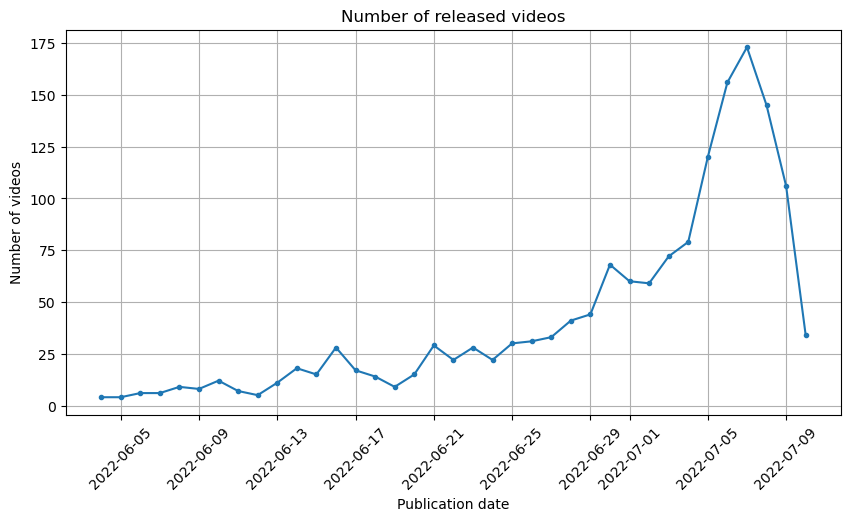

In [36]:
import matplotlib.pyplot as plt
df = data.groupby('video_id').publishedAt.first().reset_index()
df = df.publishedAt.dt.date.value_counts().sort_index(ascending=False)

plt.figure(figsize=(10,5))
plt.title('Number of released videos')

df.plot(marker='.')

plt.xticks(rotation=45)
plt.xlabel('Publication date')
plt.ylabel('Number of videos')
plt.grid(True)
plt.show()

Similarly bar plots are obtained by `.bar` method.

Build a bar plot of the number of published videos depending on the country:

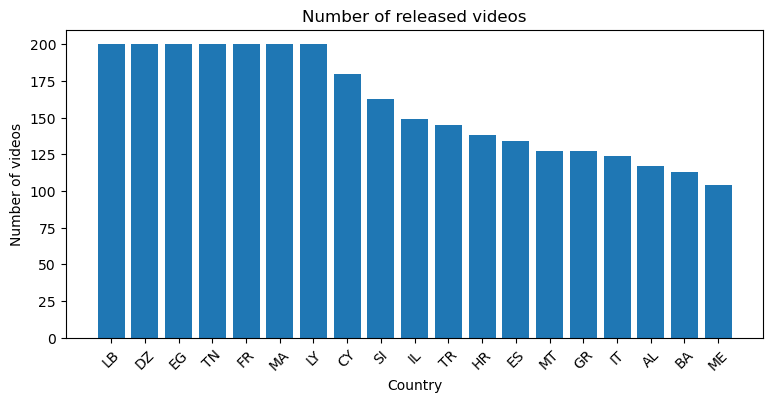

In [37]:
df = data.country.value_counts()


plt.figure(figsize=(9,4))
plt.title('Number of released videos')

plt.bar(df.index, df.values)
plt.xticks(rotation=45)

plt.xlabel('Country')
plt.ylabel('Number of videos')
plt.show()

Finally, we can create scatter plot using `.scatter` method.

Build a scatter plot depending on the number of comments for a video and on the number of views for videos in France. The chart does not need to take into account videos with disabled comments (`comments_disabled=True`):

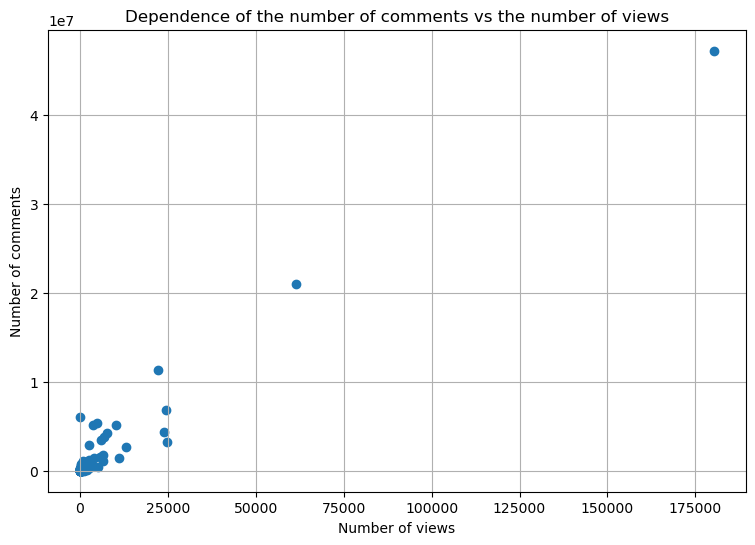

In [38]:
df = data[data.comments_disabled == False].copy()
df = df[df.country == 'FR']

plt.figure(figsize=(9,6))
plt.title('Dependence of the number of comments vs the number of views')

plt.scatter(df.comment_count, df.view_count)

plt.xlabel('Number of views')
plt.ylabel('Number of comments')
plt.grid(True)
plt.show()

Rules:

1. The use of AI and any other violation mentioned in the Academic Integrity Policy is strictly prohibited , for more info please refer to the Academic Integrity Policy of Constructor University: https://constructor.university/sites/default/files/2024-09/CAI%202024%20vf.pdf
If a student work violates these rule, the work will be disregarded, 0 points will be granted and the Academic Integrity team might be informed.

2. Students are not allowed to copy and paste examples described in the lab, if an example contains several lines of code and implements non-trivial idea. Please, write the code by your own. Violation of this rule will result in points being deducted. Even at theoretical answers, copy-paste will not be tolerated, use own words to improve critical thinking.